# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [2]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [3]:
df_yellow.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.00,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.00,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.00,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.00,0.3,30.30,2.5,0.0
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.30,1.0,N,138,161,1,33.0,3.0,0.5,13.00,6.55,0.3,56.35,2.5,0.0
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.20,0.00,0.3,26.00,2.5,0.0
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.0,0.5,0.5,0.00,0.00,0.3,12.80,2.5,0.0
8,2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,N,166,236,1,12.0,0.5,0.5,2.25,0.00,0.3,18.05,2.5,0.0
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1.0,0.78,1.0,N,236,141,2,5.0,0.5,0.5,0.00,0.00,0.3,8.80,2.5,0.0


In [4]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


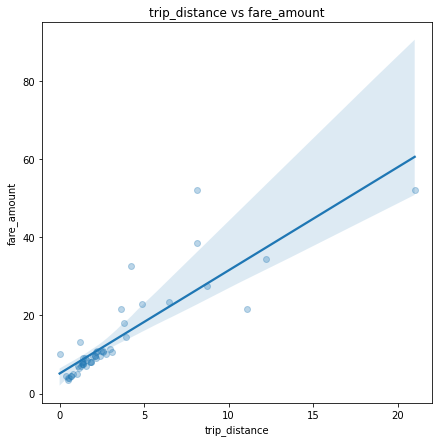

In [5]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [6]:
# Write your code

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [7]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [8]:
# FOR YELLOW DF
import pandas as pd

# Merged based on 'PULocationID'
merged_yellow_pu = pd.merge(df_yellow, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_yellow = pd.merge(merged_yellow_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_yellow.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_yellow.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

df_with_coord_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_zone,PU_lat,PU_lng,DO_zone,DO_lat,DO_lng
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.3,21.95,2.5,0.0,Lincoln Square East,40.773906,-73.981352,Upper East Side North,40.780491,-73.956972
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.3,13.30,0.0,0.0,Upper East Side North,40.780491,-73.956972,Central Harlem North,40.821046,-73.939516
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.3,10.56,0.0,0.0,Morningside Heights,40.809570,-73.961815,Morningside Heights,40.809570,-73.961815
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.3,11.80,2.5,0.0,Greenwich Village South,40.728612,-73.998678,East Chelsea,40.748397,-73.999940
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.3,30.30,2.5,0.0,East Chelsea,40.748397,-73.999940,Midtown North,40.764425,-73.978367


In [9]:
import keplergl
import pandas as pd

# Create a new DataFrame with 'lat' and 'lng' columns from merged_yellow_do
locations_df = df_with_coord_yellow[['PU_lat', 'PU_lng', 'DO_lat', 'DO_lng']]

# Create a Kepler.gl map instance
map_1 = keplergl.KeplerGl(height=600)

# Add DataFrame to the Kepler.gl map as a GeoJSON layer
map_1.add_data(data=locations_df, name='Taxi Demand')

# Configure the visualization layers
map_1.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [
                {
                    'type': 'heatmap',
                    'config': {
                        'dataId': 'Taxi Demand',
                        'label': 'Hot Spots',
                        'colorRange': [
                            [255, 69, 0],
                            [255, 150, 0],
                            [255, 196, 0],
                            [255, 235, 59],
                            [76, 175, 80],
                            [0, 150, 136]
                        ],
                        'isVisible': True,
                        'visConfig': {
                            'opacity': 0.8,
                            'colorRange': {
                                'name': 'UberPool 6',
                                'type': 'diverging',
                                'category': 'Uber',
                                'colors': [
                                    '#213E9A',
                                    '#2C6BA0',
                                    '#3683A6',
                                    '#419CAE',
                                    '#4CA5B3',
                                    '#57AEB7'
                                ]
                            },
                            'radiusPixels': 50,
                            'intensity': 1,
                            'threshold': 0.05
                        }
                    },
                    'visualChannels': {
                        'weightField': {
                            'name': None,
                            'type': 'real'
                        },
                        'weightScale': 'linear'
                    }
                }
            ],
            'interactionConfig': {
                'tooltip': {
                    'fieldsToShow': {
                        'Taxi Demand': [
                            {
                                'name': 'PU_lat',
                                'format': None
                            },
                            {
                                'name': 'PU_lng',
                                'format': None
                            }
                        ]
                    },
                    'enabled': True
                },
                'brush': {
                    'size': 0.5,
                    'enabled': False
                }
            },
            'layerBlending': 'normal',
            'splitMaps': [],
            'animationConfig': {
                'currentTime': None,
                'speed': 1
            }
        },
        'mapState': {
            'bearing': 0,
            'dragRotate': False,
            'latitude': locations_df['PU_lat'].mean(),
            'longitude': locations_df['PU_lng'].mean(),
            'pitch': 0,
            'zoom': 10  # Adjust the zoom level as needed
        },
        'mapStyle': {
            'styleType': 'light',
            'topLayerGroups': {},
            'visibleLayerGroups': {
                'label': True,
                'road': True,
                'border': False,
                'building': True,
                'water': True,
                'land': True,
                '3d building': False
            },
            'threeDBuildingColor': [218.820230]
        }
    }
}

# Display the map
map_1




User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'type': 'heatmap', 'config': {'dataId': …

In [10]:
# FOR GREEN DF
import pandas as pd

# Merged based on 'PULocationID'
merged_green_pu = pd.merge(df_green, df_zones, left_on='PULocationID', right_on='LocationID', how='left')

# Merged based on 'DOLocationID'
df_with_coord_green = pd.merge(merged_green_pu, df_zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Removed unwanted columns
df_with_coord_green.drop(['LocationID_x', 'LocationID_y', 'borough_x', 'Shape_Leng_y', 'Shape_Area_y', 'borough_y', 'Shape_Leng_x', 'Shape_Area_x'], axis=1, inplace=True)

# Renamed columns
df_with_coord_green.rename(columns={'lat_x': 'PU_lat', 'lng_x': 'PU_lng', 'lat_y': 'DO_lat', 'lng_y': 'DO_lng', 'zone_x': 'PU_zone', 'zone_y': 'DO_zone'}, inplace=True)

df_with_coord_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PU_zone,PU_lat,PU_lng,DO_zone,DO_lat,DO_lng
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,4.80,2.0,1.0,0.00,Central Harlem North,40.821046,-73.939516,Central Harlem North,40.821046,-73.939516
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,10.80,2.0,1.0,0.00,Hamilton Heights,40.827535,-73.947368,Central Harlem,40.804205,-73.952065
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,23.15,1.0,1.0,2.75,Central Harlem,40.804205,-73.952065,Lenox Hill East,40.765507,-73.954568
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,9.30,2.0,1.0,0.00,Park Slope,40.672019,-73.979045,Park Slope,40.672019,-73.979045
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,31.26,1.0,1.0,2.75,Brooklyn Heights,40.696238,-73.995329,Murray Hill,40.747654,-73.976942


In [11]:
locations_df = df_with_coord_green[['DO_lat', 'DO_lng']]

# Create a Kepler.gl map instance
map_1 = keplergl.KeplerGl(height=600)

# Add DataFrame to the Kepler.gl map as a GeoJSON layer
map_1.add_data(data=locations_df, name='Taxi Demand')

# Configure the visualization layers
map_1.config = {
    'version': 'v1',
    'config': {
        'visState': {
            'layers': [
                {
                    'type': 'heatmap',
                    'config': {
                        'dataId': 'Taxi Demand',
                        'label': 'Hot Spots',
                        'colorRange': [
                            [255, 69, 0],
                            [255, 150, 0],
                            [255, 196, 0],
                            [255, 235, 59],
                            [76, 175, 80],
                            [0, 150, 136]
                        ],
                        'isVisible': True,
                        'visConfig': {
                            'opacity': 0.8,
                            'colorRange': {
                                'name': 'UberPool 6',
                                'type': 'diverging',
                                'category': 'Uber',
                                'colors': [
                                    '#213E9A',
                                    '#2C6BA0',
                                    '#3683A6',
                                    '#419CAE',
                                    '#4CA5B3',
                                    '#57AEB7'
                                ]
                            },
                            'radiusPixels': 50,
                            'intensity': 1,
                            'threshold': 0.05
                        }
                    },
                    'visualChannels': {
                        'weightField': {
                            'name': None,
                            'type': 'real'
                        },
                        'weightScale': 'linear'
                    }
                }
            ],
            'interactionConfig': {
                'tooltip': {
                    'fieldsToShow': {
                        'Taxi Demand': [
                            {
                                'name': 'DO_lat',
                                'format': None
                            },
                            {
                                'name': 'DO_lng',
                                'format': None
                            }
                        ]
                    },
                    'enabled': True
                },
                'brush': {
                    'size': 0.5,
                    'enabled': False
                }
            },
            'layerBlending': 'normal',
            'splitMaps': [],
            'animationConfig': {
                'currentTime': None,
                'speed': 1
            }
        },
        'mapState': {
            'bearing': 0,
            'dragRotate': False,
            'latitude': locations_df['DO_lat'].mean(),
            'longitude': locations_df['DO_lng'].mean(),
            'pitch': 0,
            'zoom': 10  # Adjust the zoom level as needed
        },
        'mapStyle': {
            'styleType': 'light',
            'topLayerGroups': {},
            'visibleLayerGroups': {
                'label': True,
                'road': True,
                'border': False,
                'building': True,
                'water': True,
                'land': True,
                '3d building': False
            },
            'threeDBuildingColor': [218.820230]
        }
    }
}

# Display the map
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'type': 'heatmap', 'config': {'dataId': …

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [12]:
# Write your code

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [13]:
# Write your code

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.